In [6]:
import numpy as np
from keras.preprocessing import image
from keras_vggface.vggface import VGGFace
from keras_vggface import utils
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import os
import matplotlib.pyplot as plt
from PIL import Image

In [7]:
model = VGGFace(model='resnet50')
model = Model(inputs=model.input, outputs=model.layers[-2].output)  
face = MTCNN()

In [8]:
def LoadData(X):
    X = X + '/vec.npy'
    X = np.load(X)
    X = X.reshape((X.shape[0],X.shape[2]))
    return X

def LoadImage(X,face):
    X = X + '/quary.jpeg'
    X = cv2.imread(X)
    output = face.detect_faces(X)
    x,y,w,h = output[0]['box']
    X = X[x:x+h, y:y+h]
    X = X.transpose(2,0,1)
    B = cv2.resize(X[0], (224,224))
    G = cv2.resize(X[1], (224,224))
    R = cv2.resize(X[2], (224,224))
    X = np.concatenate([[R],[G],[B]])
    return X.transpose(1,2,0)

def QVector(X,model,face):
    X = LoadImage(X,face)
    X = X.reshape((1, X.shape[0], X.shape[1], X.shape[2]))
    X = model.predict(X)
    X = X.reshape((X.shape[1]))
    return X

def COS(X,model,face):
    V1 = QVector(X,model,face)
    V2 = LoadData(X)
    dot = np.dot(V1,V2.T)
    norm1 = np.linalg.norm(V1)
    norm2 = np.linalg.norm(V2, axis=1)
    norm = norm2*norm1
    norm = dot/norm
    return norm

def MaxIndex(X,model,face):
    X = COS(X,model,face)
    X = np.argsort(-X)
    X = X[:9]
    return X

def Resize(X):
    X = X.transpose(2,0,1)
    A = cv2.resize(X[0], (224,224))
    B = cv2.resize(X[1], (224,224))
    C = cv2.resize(X[2], (224,224))
    X = np.concatenate([[A],[B],[C]])
    return X.transpose(1,2,0)

def Match(X,model,face):
    lst = MaxIndex(X,model,face)
    X = X + '/DataBase'
    lst1 = os.listdir(X)
    index = []
    for i in lst:
        index = index + [lst1[i]]
    image_list = []
    for filename in index:
        img = Image.open(os.path.join(X, filename))
        img = np.array(img)
        img = Resize(img)
        image_list = image_list + [img]
    return np.array(image_list)

path = '/home/deb/VggFace'
img = Match(path,model,face)

1/1 [==============================] - 1s 708ms/step


# Viewing Quary Image

1/1 [==============================] - 0s 27ms/step


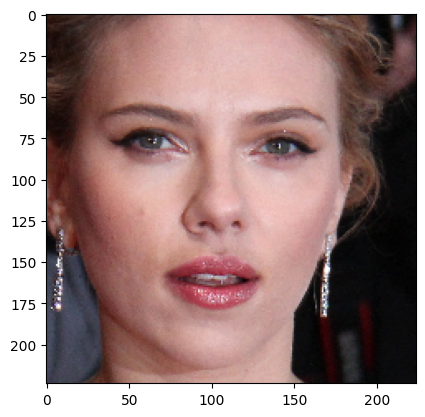

In [9]:
quary = LoadImage(path,face)
plt.imshow(quary)
plt.show()

# Showing Face Maches

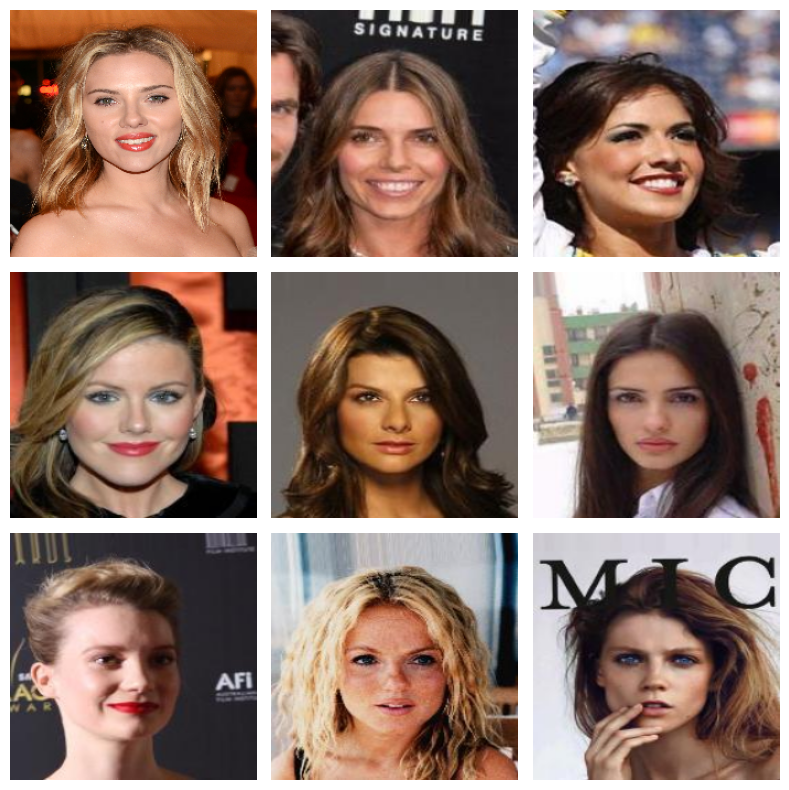

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(img[i])
    ax.axis('off')

fig.tight_layout()
plt.show()

# Note: I only had one photo of Scarlett Johansson in my database, so I only found one match. However, with more photos of her, it will give more results, which will improve our project.